# Assignment 1


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
1、每一步的cost值非负  
2、每一步优先选择当前cost值最小的节点进行搜索

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
没有办法保证找到最优解。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
当求解目的是必须找到最优解时，要使用BFS。  
当求解目标是只要找到解即可，而且内存大小受限，则要使用DFS。

##### 2.4 When can we use machine learning ?
机器学习是从数据中发现规律。当我们的使用场景是有大量数据可用于训练，而且规律存在于数据中，则可使用机器学习。

##### 2.5 What is the gradient of a function ?
函数值变化最快的方向是梯度的方向，这个方向的导数就是梯度的大小。

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
我们使用梯度下降法来求函数最小值。如果要求函数最大值，就给这个函数加个负号，就转化为求最小值了。

#### 3. 实践部分  寻找地铁路线

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

### (Optional) Improve your agent to make it able to find a path based on different strategies

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [2]:
# 获取URL数据（北京地铁数据，来自高德）：http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json
import requests
import re
import numpy as np
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')

In [3]:
def get_lines_stations_info(text):
    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_info = {}
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
    stations_info = {}

    pattern = re.compile('"st".*?"kn"')
    lines_list = pattern.findall(text)
    for i in range(len(lines_list)):
        # 地铁线路名
        pattern = re.compile('"ln":".*?"')
        line_name = pattern.findall(lines_list[i])[0][6:-1]
        # 站点信息list
        pattern = re.compile('"rs".*?"sp"')
        temp_list = pattern.findall(lines_list[i])
        station_name_list = []
        for j in range(len(temp_list)):
            # 站名
            pattern = re.compile('"n":".*?"')
            station_name = pattern.findall(temp_list[j])[0][5:-1]
            station_name_list.append(station_name)
            # 坐标(x,y)
            pattern = re.compile('"sl":".*?"')
            position = tuple(map(float, pattern.findall(temp_list[j])[0][6:-1].split(',')))
            # 数据加入站点信息dict
            stations_info[station_name] = position

        # 数据加入地铁线路dict
        lines_info[line_name] = station_name_list
    return lines_info, stations_info

lines_info, stations_info = get_lines_stations_info(r.text)
stations_info

{'金安桥': (116.163167, 39.92362),
 '四道桥': (116.13401, 39.91603),
 '桥户营': (116.125809, 39.912383),
 '上岸': (116.122225, 39.905138),
 '栗园庄': (116.123254, 39.89578),
 '小园': (116.114443, 39.890465),
 '石厂': (116.100334, 39.889378),
 '苹果园': (116.177388, 39.926727),
 '古城': (116.190337, 39.90745),
 '八角游乐园': (116.212684, 39.907442),
 '八宝山': (116.235948, 39.90744),
 '玉泉路': (116.252888, 39.907433),
 '五棵松': (116.273987, 39.907456),
 '万寿路': (116.294765, 39.907474),
 '公主坟': (116.309919, 39.907469),
 '军事博物馆': (116.321459, 39.907422),
 '木樨地': (116.337583, 39.907379),
 '南礼士路': (116.352583, 39.907234),
 '复兴门': (116.356866, 39.907242),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.391278, 39.907472),
 '天安门东': (116.401216, 39.90778),
 '王府井': (116.411571, 39.908069),
 '东单': (116.41848, 39.908325),
 '建国门': (116.435806, 39.908501),
 '永安里': (116.450497, 39.908454),
 '国贸': (116.461841, 39.909104),
 '大望路': (116.475783, 39.908287),
 '四惠': (116.495456, 39.908749),
 '四惠东': (116.515664, 39.908495),
 '积水潭': (116.373126

In [4]:
lines_info

{'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'],
 '1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '2号线': ['积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄',
  '西直门'],
 '4号线大兴线': ['天宫院',
  '生物医药基地',
  '义和庄',
  '黄村火车站',
  '黄村西大街',
  '清源路',
  '枣园',
  '高米店南',
  '高米店北',
  '西红门',
  '新宫',
  '公益西桥',
  '角门西',
  '马家堡',
  '北京南站',
  '陶然亭',
  '菜市口',
  '宣武门',
  '西单',
  '灵境胡同',
  '西四',
  '平安里',
  '新街口',
  '西直门',
  '动物园',
  '国家图书馆',
  '魏公村',
  '人民大学',
  '海淀黄庄',
  '中关村',
  '北京大学东门',
  '圆明园',
  '西苑',
  '北宫门',
  '安河桥北'],
 '5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑

In [5]:
len(lines_info)

24

In [6]:
def get_neighbor_info(lines_info):
    # 把str2加入str1站点的邻接表中
    def add_neighbor_dict(info, str1, str2):
        list1 = info.get(str1)
        if not list1:
            list1 = []
        list1.append(str2)
        info[str1] = list1
        return info

    # 根据线路信息，建立站点邻接表dict
    neighbor_info = {}
    for line_name,station_list in lines_info.items():
        for i in range(len(station_list) - 1):
            sta1 = station_list[i]
            sta2 = station_list[i+1]
            neighbor_info = add_neighbor_dict(neighbor_info, sta1, sta2)
            neighbor_info = add_neighbor_dict(neighbor_info, sta2, sta1)
            
    return neighbor_info
        
neighbor_info = get_neighbor_info(lines_info)
neighbor_info

{'金安桥': ['四道桥', '杨庄'],
 '四道桥': ['金安桥', '桥户营'],
 '桥户营': ['四道桥', '上岸'],
 '上岸': ['桥户营', '栗园庄'],
 '栗园庄': ['上岸', '小园'],
 '小园': ['栗园庄', '石厂'],
 '石厂': ['小园'],
 '苹果园': ['古城'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '崇文门', '灯市口'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '积水潭': ['鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '什刹海', '安德里北街'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥'],
 '东四十条'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


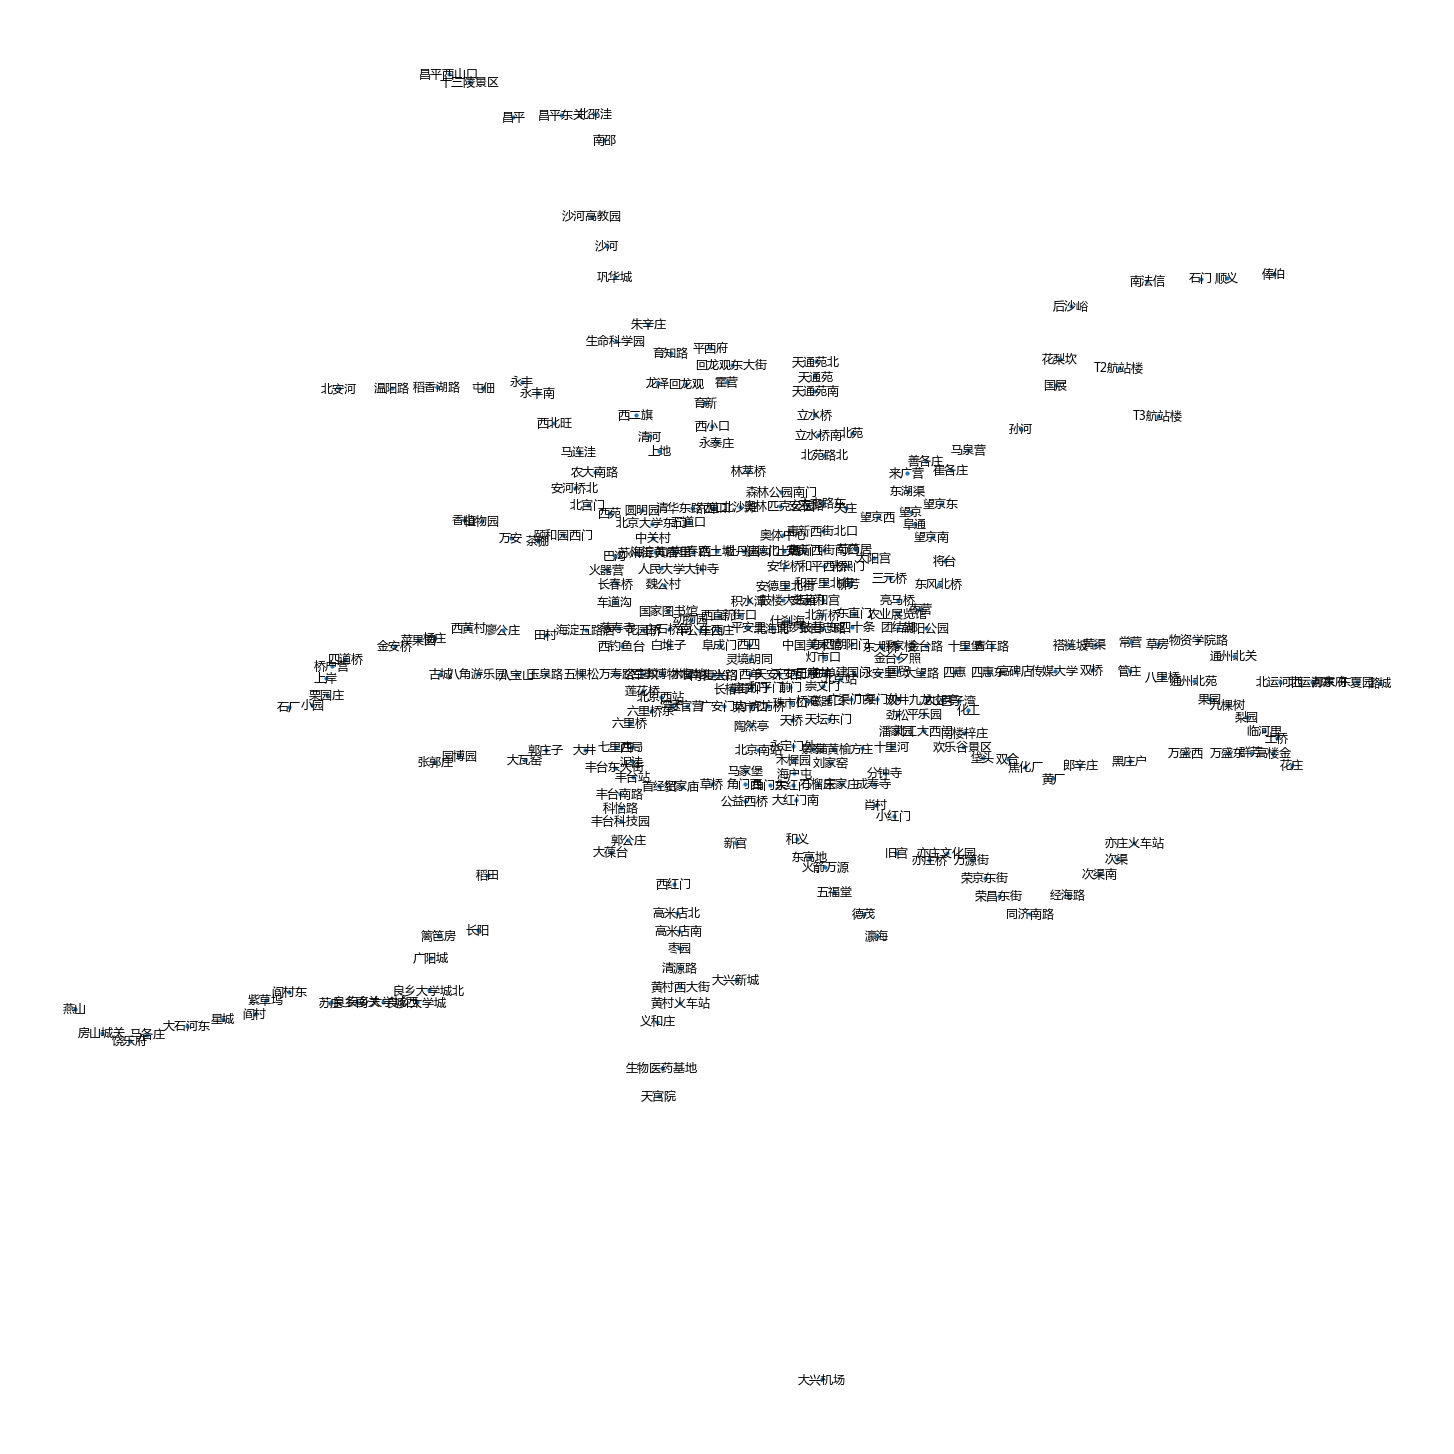

In [7]:
# 画地铁图
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
# 此代码解决不显示汉字的问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
# matplotlib.rcParams['font.family']='sans-serif'
plt.figure(figsize=(20,20))
stations_graph = nx.Graph()
stations_graph.add_nodes_from(list(stations_info.keys()))
nx.draw(stations_graph, stations_info, with_labels=True, node_size=10)

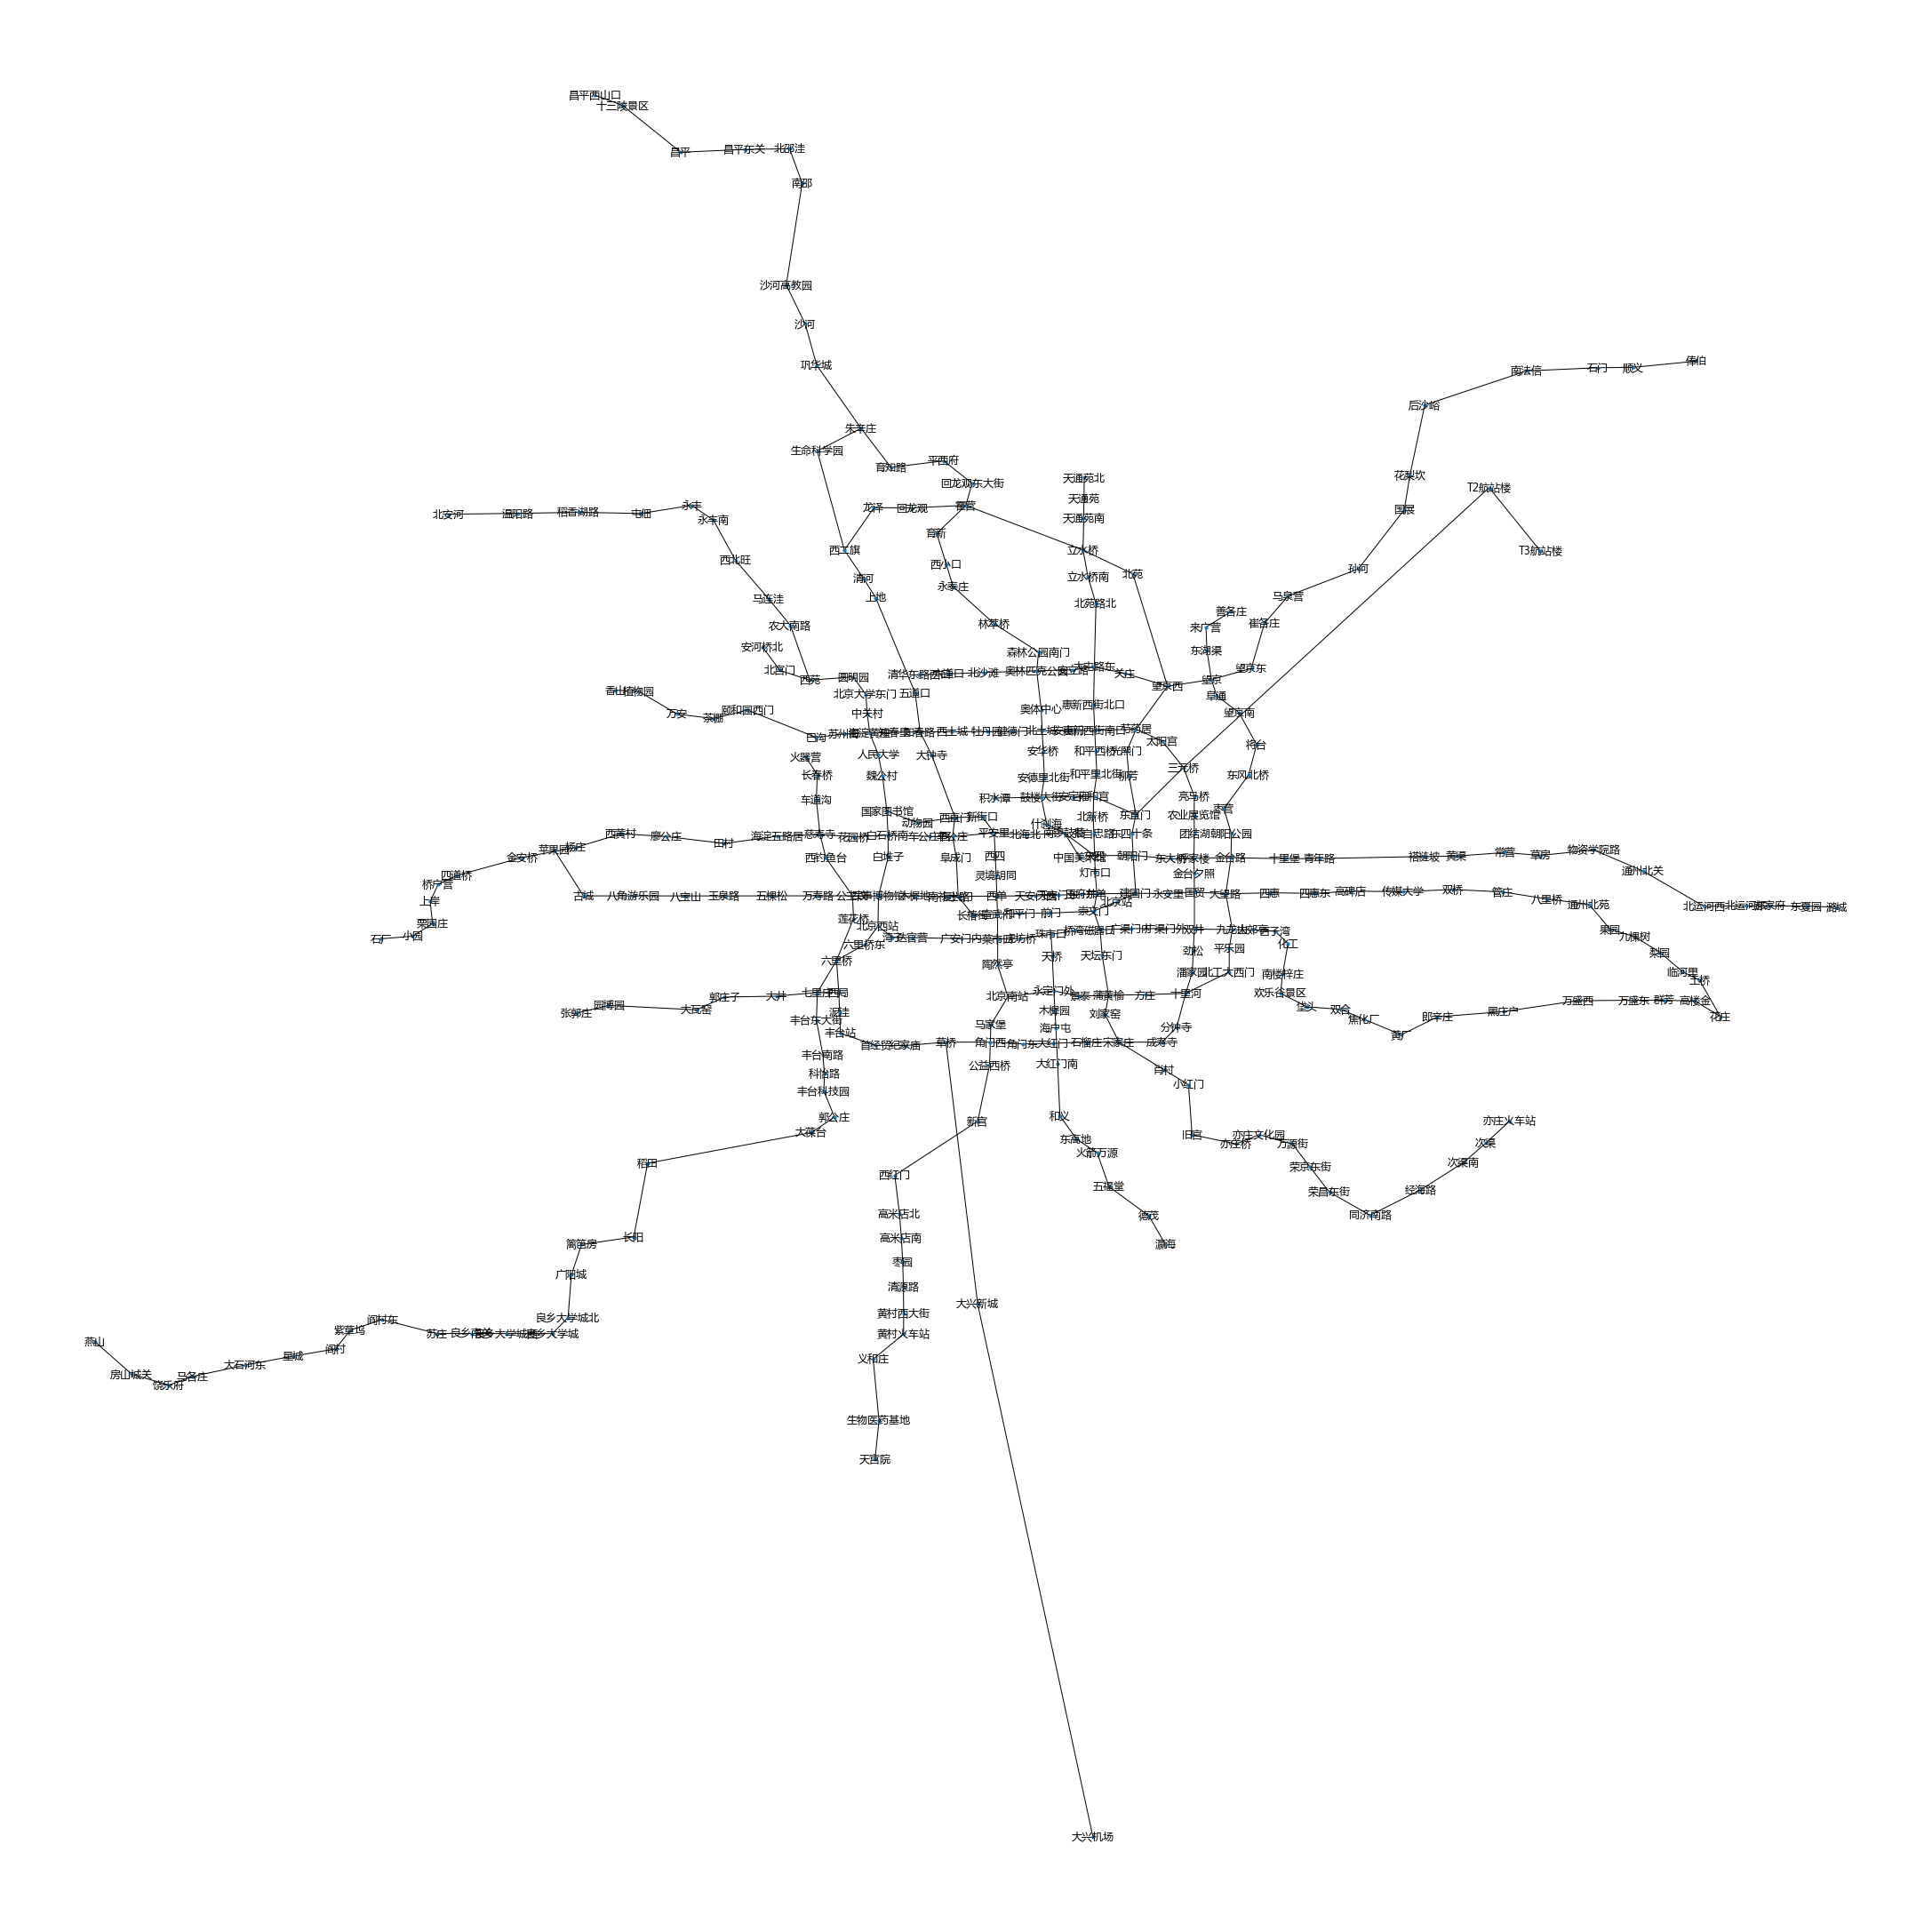

In [8]:
stations_connection_graph = nx.Graph(neighbor_info)
plt.figure(figsize=(30,30))
nx.draw(stations_connection_graph,stations_info,with_labels=True,node_size=10)

In [12]:
# 第一种算法：递归查找所有路径
def get_path_DFS_ALL(lines_info, neighbor_info, from_station, to_station):
    # 递归算法，本质上是深度优先
    # 遍历所有路径
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    path = []
    this_station = from_station
    path.append(this_station)
    neighbors = neighbor_info.get(this_station)
    node = {'pre_station':'',
            'this_station':this_station,
            'neighbors':neighbors,
            'path':path}
    
    return get_next_station_DFS_ALL(node, neighbor_info, to_station)

def get_next_station_DFS_ALL(node, neighbor_info, to_station):
    neighbors = node.get('neighbors')
    pre_station = node.get('this_station')
    path = node.get('path')
    paths = []
    for i in range(len(neighbors)):
        this_station = neighbors[i]
        if (this_station in path):
            # 如果此站点已经在路径中，说明环路，此路不通
            return None
        if neighbors[i] == to_station:
            # 找到终点，返回路径
            path.append(to_station)
            paths.append(path)
            return paths
        else:
            neighbors_ = neighbor_info.get(this_station).copy()
            neighbors_.remove(pre_station)
            path_ = path.copy()
            path_.append(this_station)
            new_node = {'pre_station':pre_station,
                        'this_station':this_station,
                        'neighbors':neighbors_,
                        'path':path_}
            paths_ =  get_next_station_DFS_ALL(new_node, neighbor_info, to_station)
            if paths_:
                paths.extend(paths_)

    return paths

paths = get_path_DFS_ALL(lines_info, neighbor_info, '回龙观', '西二旗')
print('共有%d种路径。'%len(paths))
for item in paths:
    print("此路径总计%d站:"%(len(item)-1))
    print('-'.join(item))

KeyboardInterrupt: 

In [11]:
# 第二种算法：没有启发函数的简单宽度优先
def get_path_BFS(lines_info, neighbor_info, from_station, to_station):
    # 搜索策略：以站点数量为cost（因为车票价格是按站算的）
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 由于每深一层就是cost加1，所以每层的cost都相同，算和不算没区别，所以省略
    
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    
    # 搜索节点是个dict，key=站名，value是包含路过的站点list
    nodes = {}
    nodes[from_station] = [from_station]
    
    while True:
        new_nodes = {}
        for (k,v) in nodes.items():
            neighbor = neighbor_info.get(k).copy()
            if (len(v) >= 2):
                # 不往上一站走
                pre_station = v[-2]
                neighbor.remove(pre_station)
            for station in neighbor:
                # 遍历邻居
                if station in nodes:
                    # 跳过已搜索过的节点
                    continue
                path = v.copy()
                path.append(station)
                new_nodes[station] = path
                if station == to_station:
                    # 找到路径，结束
                    return path
        nodes = new_nodes
        
    print('未能找到路径')
    return None

paths = get_path_BFS(lines_info, neighbor_info, '回龙观', '西二旗')
print("路径总计%d站。"%(len(paths)-1))
print("-".join(paths))
# 高德导航是31站，只有1次换乘
# 代码结果是28站，但是有5次换乘
# 猜测高德的路径cost主要是时间

路径总计2站。
回龙观-龙泽-西二旗


In [ ]:
# 第三种算法：以路径路程为cost的启发式搜索
import pandas as pd
def get_path_Astar(lines_info, neighbor_info, stations_info, from_station, to_station):
    # 搜索策略：以路径的站点间直线距离累加为cost，以当前站点到目标的直线距离为启发函数
    
    
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    
    # 计算所有节点到目标节点的直线距离，备用
    distances = {}
    x,y = stations_info.get(to_station)
    for (k,v) in stations_info.items():
        x0,y0 = stations_info.get(k)
        l = ((x-x0)**2 + (y-y0)**2)**0.5
        distances[k] = l
        
    # 已搜索过的节点，dict
    # key=站点名称，value是已知的起点到此站点的最小cost
    searched = {}
    searched[from_station] = 0
    
    # 数据结构为pandas的dataframe
    # index为站点名称
    # g为已走路径，h为启发函数值（当前到目标的直线距离）
    nodes = pd.DataFrame([[[from_station], 0, 0, distances.get(from_station)]],
                         index=[from_station], columns=['path', 'cost', 'g', 'h']) 
    
    count = 0
    while True:
        if count > 1000:
            break
        nodes.sort_values('cost', inplace=True)
        for index, node in nodes.iterrows():
            count += 1
            # 向邻居中离目的地最短的那个站点搜索
            neighbors = neighbor_info.get(index).copy()
            if len(node['path']) >= 2:
                # 不向这个路径的反向去搜索
                neighbors.remove(node['path'][-2])
            for i in range(len(neighbors)):
                count += 1
                neighbor = neighbors[i]
                g = node['g'] + get_distance(stations_info, index, neighbor)
                h = distances[neighbor]
                cost = g + h
                path = node['path'].copy()
                path.append(neighbor)
                if neighbor == to_station:
                    # 找到目标，结束
                    print('共检索%d次。'%count)
                    return path
                if neighbor in searched:
                    if g >= searched[neighbor]:
                        # 说明现在搜索的路径不是最优，忽略
                        continue
                    else:
                        searched[neighbor] = g
                        # 修改此站点对应的node信息
#                         nodes.loc[neighbor, 'path'] = path # 这行总是报错
#                         nodes.loc[neighbor, 'cost'] = cost
#                         nodes.loc[neighbor, 'g'] = g
#                         nodes.loc[neighbor, 'h'] = h
                        # 不知道怎么修改df中的list元素，只能删除再新增行
                        nodes.drop(neighbor, axis=0, inplace=True)
                        row = pd.DataFrame([[path, cost, g, h]],
                                       index=[neighbor], columns=['path', 'cost', 'g', 'h'])
                        nodes = nodes.append(row)
                        
                else:
                    searched[neighbor] = g
                    row = pd.DataFrame([[path, cost, g, h]],
                                       index=[neighbor], columns=['path', 'cost', 'g', 'h'])
                    nodes = nodes.append(row)
            # 这个站点的所有邻居都搜索完了，删除这个节点
            nodes.drop(index, axis=0, inplace=True)

        # 外层for循环只跑第一行数据，然后重新sort后再计算
        continue         
        
    print('未能找到路径')
    return None

def get_distance(stations_info, str1, str2):
    x1,y1 = stations_info.get(str1)
    x2,y2 = stations_info.get(str2)
    return ((x1-x2)**2 + (y1-y2)**2)** 0.5

paths = get_path_Astar(lines_info, neighbor_info, stations_info, '回龙观', '西二旗')
if paths:
    print("路径总计%d站。"%(len(paths)-1))
    print("-".join(paths))
# 高德导航是31站，只有1次换乘
# 代码结果是28站，与以地铁站数为cost的结果相同，但是路径不同（从第一种遍历的算法能看到，28站到达目的地的路径有3种）
# 猜测高德的路径cost主要是时间